In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X = pd.read_csv("datasets/training_set_features.csv")
X.head()

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [3]:
X.shape

(26707, 36)

In [4]:
X.set_index("respondent_id", inplace=True)
X.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
Y = pd.read_csv("datasets/training_set_labels.csv")
Y.head()

,respondent_id,xyz_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [6]:
Y.isna().sum()

respondent_id       0
xyz_vaccine         0
seasonal_vaccine    0
dtype: int64

In [7]:
Y.set_index("respondent_id", inplace=True)

In [8]:
Y.head()

,xyz_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


## Feature Engineering

In [9]:
import seaborn as sns

<Axes: ylabel='respondent_id'>

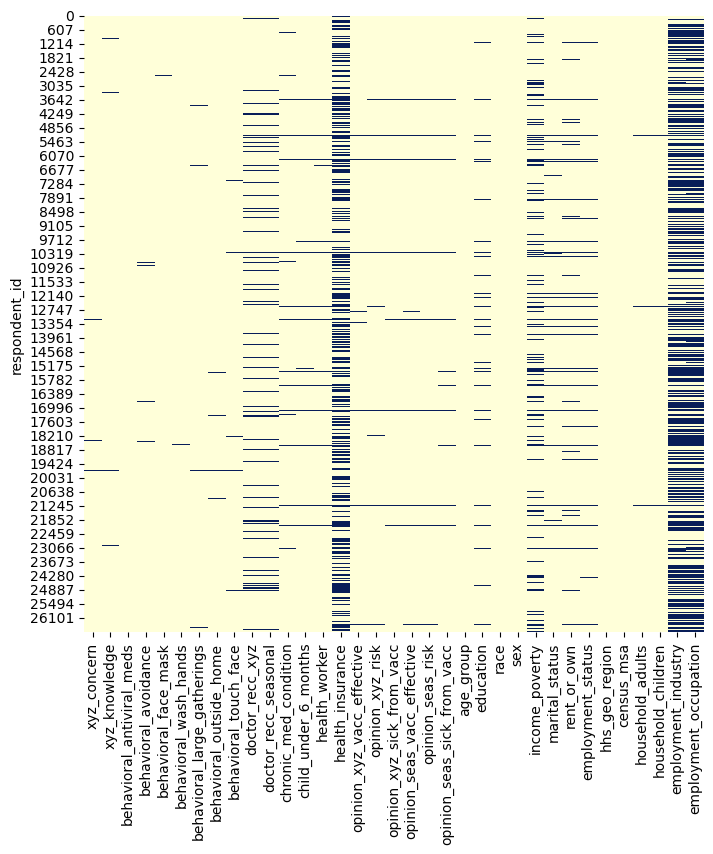

In [10]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(X.isnull(), cbar=False, cmap="YlGnBu", ax=ax) # NaN values

In [11]:
X = X.merge(Y, on="respondent_id")
X.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,xyz_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


<Axes: xlabel='employment_industry,xyz_vaccine'>

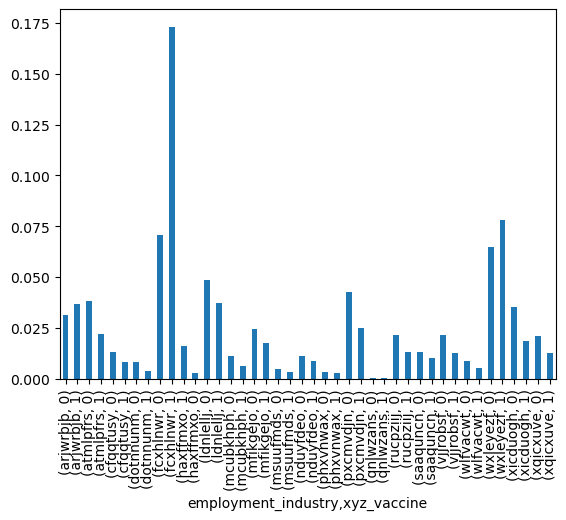

In [12]:
(X[["employment_industry", "xyz_vaccine"]].groupby("employment_industry").value_counts() / X["xyz_vaccine"].value_counts()).plot(kind='bar')

<Axes: xlabel='employment_industry,seasonal_vaccine'>

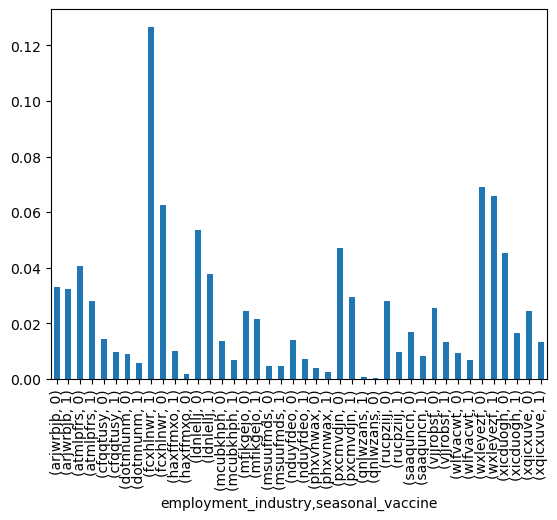

In [13]:
(X[["employment_industry", "seasonal_vaccine"]].groupby("employment_industry").value_counts() / X["seasonal_vaccine"].value_counts()).plot(kind='bar')

<Axes: xlabel='employment_occupation,xyz_vaccine'>

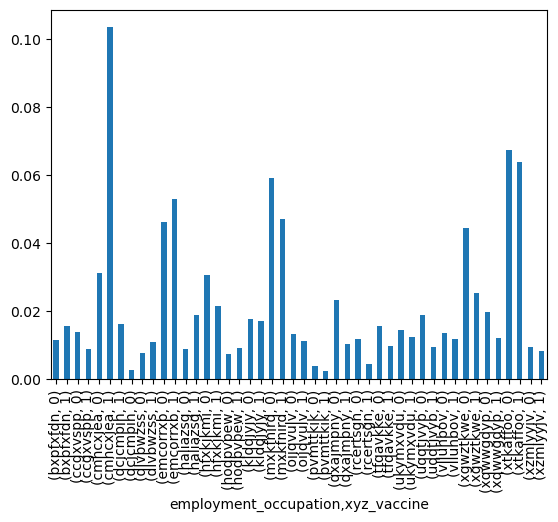

In [14]:
(X[["employment_occupation", "xyz_vaccine"]].groupby("employment_occupation").value_counts() / X["xyz_vaccine"].value_counts()).plot(kind='bar')

<Axes: xlabel='employment_occupation,seasonal_vaccine'>

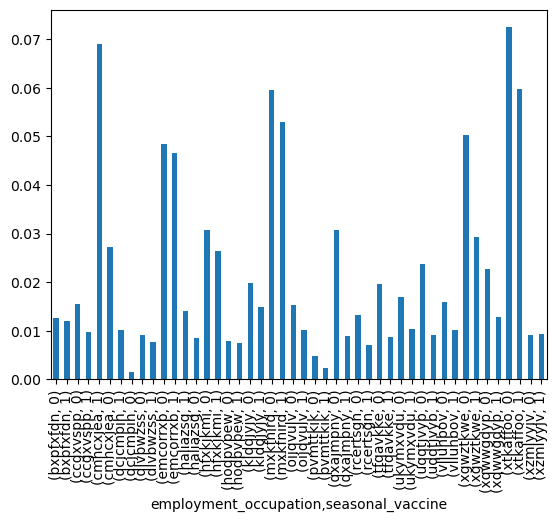

In [15]:
(X[["employment_occupation", "seasonal_vaccine"]].groupby("employment_occupation").value_counts() / X["seasonal_vaccine"].value_counts()).plot(kind='bar')

In [16]:
X[["employment_industry", "employment_occupation"]].isna().sum()

employment_industry      13330
employment_occupation    13470
dtype: int64

In [17]:
X.drop(["employment_industry", "employment_occupation"], axis=1, inplace=True) #drop employment details

In [18]:
X.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,xyz_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,0,0


In [19]:
X["health_insurance"].isna().sum()

12274

In [20]:
X[["health_insurance","income_poverty"]].isna().all(axis=1).sum()

2682

In [21]:
X[["employment_status", "income_poverty", "rent_or_own"]].groupby(["employment_status", "rent_or_own"]).value_counts()

employment_status   rent_or_own  income_poverty           
Employed            Own          <= $75,000, Above Poverty    4696
                                 > $75,000                    4604
                                 Below Poverty                 314
                    Rent         <= $75,000, Above Poverty    1808
                                 Below Poverty                 457
                                 > $75,000                     451
Not in Labor Force  Own          <= $75,000, Above Poverty    4361
                                 > $75,000                    1395
                                 Below Poverty                 644
                    Rent         <= $75,000, Above Poverty    1066
                                 Below Poverty                 843
                                 > $75,000                     137
Unemployed          Own          <= $75,000, Above Poverty     440
                                 > $75,000                     161
   

In [22]:
X["income_poverty"] = X["income_poverty"].fillna("<= $75,000, Above Poverty")
X[["employment_status", "income_poverty", "rent_or_own"]].groupby(["employment_status", "rent_or_own"]).value_counts()

employment_status   rent_or_own  income_poverty           
Employed            Own          <= $75,000, Above Poverty    5408
                                 > $75,000                    4604
                                 Below Poverty                 314
                    Rent         <= $75,000, Above Poverty    2006
                                 Below Poverty                 457
                                 > $75,000                     451
Not in Labor Force  Own          <= $75,000, Above Poverty    5480
                                 > $75,000                    1395
                                 Below Poverty                 644
                    Rent         <= $75,000, Above Poverty    1421
                                 Below Poverty                 843
                                 > $75,000                     137
Unemployed          Own          <= $75,000, Above Poverty     520
                                 > $75,000                     161
   

In [23]:
X[["health_insurance", "xyz_vaccine"]].groupby("xyz_vaccine").value_counts()

xyz_vaccine  health_insurance
0            1.0                 8663
             0.0                 1480
1            1.0                 4034
             0.0                  256
Name: count, dtype: int64

In [24]:
X[["health_insurance", "seasonal_vaccine"]].groupby("seasonal_vaccine").value_counts()

seasonal_vaccine  health_insurance
0                 1.0                 5866
                  0.0                 1338
1                 1.0                 6831
                  0.0                  398
Name: count, dtype: int64

In [25]:
X[["health_insurance", "income_poverty"]].groupby("income_poverty").value_counts()

income_poverty             health_insurance
<= $75,000, Above Poverty  1.0                 7927
                           0.0                 1099
> $75,000                  1.0                 3703
                           0.0                  119
Below Poverty              1.0                 1067
                           0.0                  518
Name: count, dtype: int64

In [26]:
X[["rent_or_own", "income_poverty"]].groupby("income_poverty").value_counts()

income_poverty             rent_or_own
<= $75,000, Above Poverty  Own            11474
                           Rent            3755
> $75,000                  Own             6166
                           Rent             622
Below Poverty              Rent            1552
                           Own             1096
Name: count, dtype: int64

In [27]:
X[["census_msa", "income_poverty"]].groupby("income_poverty").value_counts()

income_poverty             census_msa              
<= $75,000, Above Poverty  MSA, Not Principle  City    7307
                           Non-MSA                     4954
                           MSA, Principle City         4939
> $75,000                  MSA, Not Principle  City    3421
                           MSA, Principle City         2063
                           Non-MSA                     1326
Below Poverty              Non-MSA                      918
                           MSA, Not Principle  City     917
                           MSA, Principle City          862
Name: count, dtype: int64

In [28]:
X[["census_msa", "xyz_vaccine"]].groupby("census_msa").value_counts() / X["xyz_vaccine"].value_counts()

census_msa                xyz_vaccine
MSA, Not Principle  City  0              0.436362
                          1              0.434790
MSA, Principle City       0              0.293967
                          1              0.296264
Non-MSA                   0              0.269671
                          1              0.268946
Name: count, dtype: float64

In [29]:
X[["hhs_geo_region", "xyz_vaccine"]].groupby("hhs_geo_region").value_counts() / X["xyz_vaccine"].value_counts()

hhs_geo_region  xyz_vaccine
atmpeygn        0              0.075643
                1              0.077899
bhuqouqj        0              0.100319
                1              0.129714
dqpwygqj        0              0.044359
                1              0.034015
fpwskwrf        0              0.123948
                1              0.115968
kbazzjca        0              0.108924
                1              0.099930
lrircsnp        0              0.078020
                1              0.077018
lzgpxyit        0              0.167499
                1              0.136412
mlyzmhmf        0              0.082062
                1              0.091117
oxchjgsf        0              0.104550
                1              0.116320
qufhixun        0              0.114677
                1              0.121607
Name: count, dtype: float64

In [30]:
X.drop(["rent_or_own", "census_msa", "hhs_geo_region"], axis=1, inplace=True)
X.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,education,race,sex,income_poverty,marital_status,employment_status,household_adults,household_children,xyz_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,< 12 Years,White,Female,Below Poverty,Not Married,Not in Labor Force,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,12 Years,White,Male,Below Poverty,Not Married,Employed,0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Employed,2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,12 Years,White,Female,Below Poverty,Not Married,Not in Labor Force,0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Some College,White,Female,"<= $75,000, Above Poverty",Married,Employed,1.0,0.0,0,0


In [31]:
X["health_insurance"] = X["health_insurance"].fillna(1.0)

<Axes: ylabel='respondent_id'>

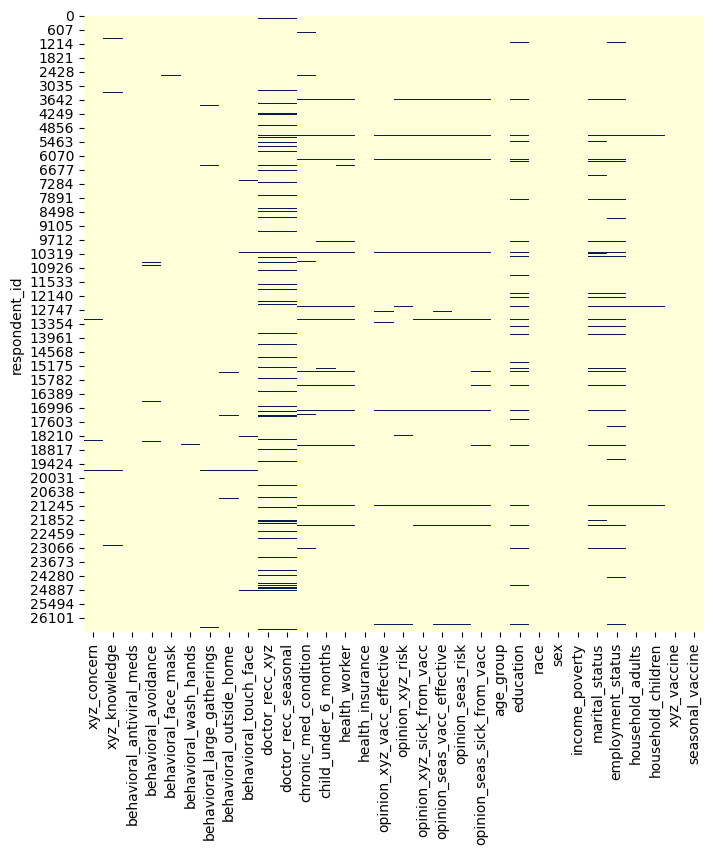

In [32]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(X.isnull(), cbar=False, cmap="YlGnBu", ax=ax)

In [33]:
X[["doctor_recc_xyz", "doctor_recc_seasonal"]].isna().all(axis=1).sum()

2160

In [34]:
X[["health_insurance", "doctor_recc_xyz"]].groupby("health_insurance").value_counts()

health_insurance  doctor_recc_xyz
0.0               0.0                 1414
                  1.0                  283
1.0               0.0                17725
                  1.0                 5125
Name: count, dtype: int64

In [35]:
X[["health_insurance", "doctor_recc_seasonal"]].groupby("health_insurance").value_counts()

health_insurance  doctor_recc_seasonal
0.0               0.0                      1367
                  1.0                       330
1.0               0.0                     15086
                  1.0                      7764
Name: count, dtype: int64

In [36]:
X[["xyz_concern", "doctor_recc_xyz"]].groupby("xyz_concern").value_counts()

xyz_concern  doctor_recc_xyz
0.0          0.0                2594
             1.0                 437
1.0          0.0                6384
             1.0                1239
2.0          0.0                7349
             1.0                2327
3.0          0.0                2751
             1.0                1393
Name: count, dtype: int64

In [37]:
X[["xyz_concern", "doctor_recc_xyz"]]

,xyz_concern,doctor_recc_xyz
respondent_id,,
0,1.0,0.0
1,3.0,0.0
2,1.0,NaN
3,1.0,0.0
4,2.0,0.0
...,...,...
26702,2.0,0.0
26703,1.0,1.0
26704,2.0,0.0


In [38]:
X["doctor_recc_xyz"] = X["doctor_recc_xyz"].fillna(X["xyz_concern"].map({0.0:0.0, 1.0:0.0, 2.0:0.0, 3.0:1.0}))
X["doctor_recc_xyz"].sum()

5855.0

In [39]:
X["doctor_recc_seasonal"] = X["doctor_recc_seasonal"].fillna(X["doctor_recc_xyz"])
X["doctor_recc_seasonal"].sum()

8541.0

In [40]:
X.shape

(26707, 32)

In [41]:
X[["age_group", "household_children"]].groupby("age_group").value_counts()

age_group      household_children
18 - 34 Years  0.0                   2573
               1.0                    983
               2.0                    897
               3.0                    632
35 - 44 Years  0.0                   1149
               2.0                   1110
               1.0                    760
               3.0                    751
45 - 54 Years  0.0                   3293
               1.0                    945
               2.0                    698
               3.0                    264
55 - 64 Years  0.0                   5044
               1.0                    340
               2.0                    112
               3.0                     65
65+ Years      0.0                   6613
               1.0                    147
               2.0                     47
               3.0                     35
Name: count, dtype: int64

<Axes: ylabel='respondent_id'>

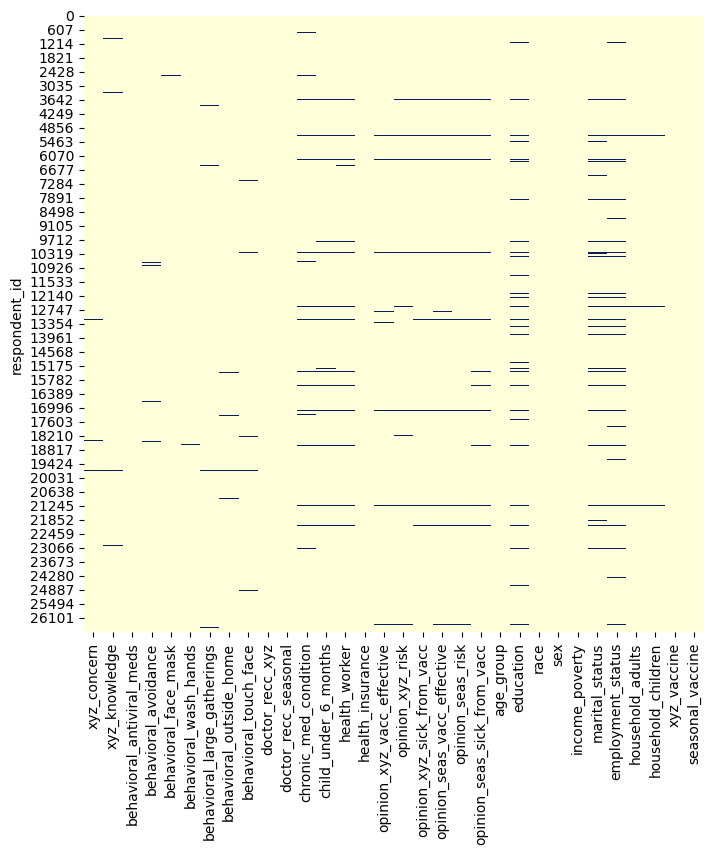

In [42]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(X.isnull(), cbar=False, cmap="YlGnBu", ax=ax)

In [43]:
X.isna().any(axis=1).sum()

2705

In [44]:
X.education.unique()

array(['< 12 Years', '12 Years', 'College Graduate', 'Some College', nan],
      dtype=object)

<Axes: >

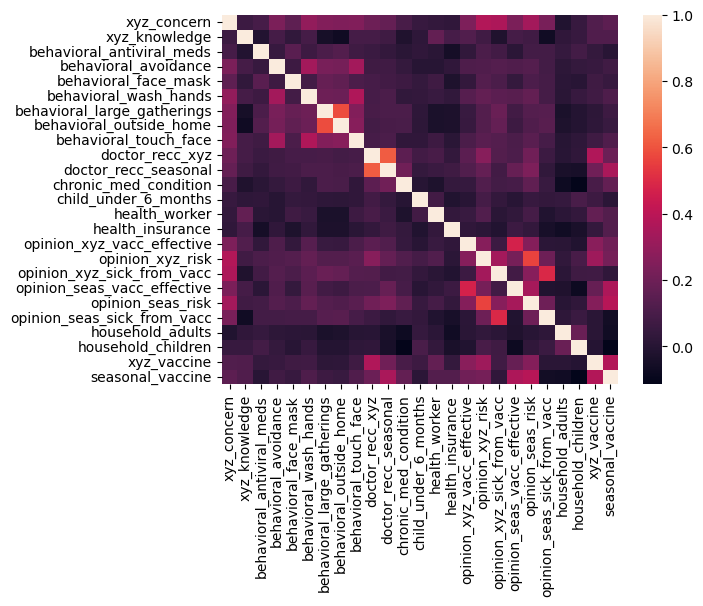

In [45]:
sns.heatmap(X.corr(numeric_only=True))

In [46]:
X.dropna(axis=0, inplace=True)
X.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,education,race,sex,income_poverty,marital_status,employment_status,household_adults,household_children,xyz_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,< 12 Years,White,Female,Below Poverty,Not Married,Not in Labor Force,0.0,0.0,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,12 Years,White,Male,Below Poverty,Not Married,Employed,0.0,0.0,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Employed,2.0,0.0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,12 Years,White,Female,Below Poverty,Not Married,Not in Labor Force,0.0,0.0,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Some College,White,Female,"<= $75,000, Above Poverty",Married,Employed,1.0,0.0,0,0


In [47]:
Y = X[["xyz_vaccine", "seasonal_vaccine"]].copy()
Y.head()

,xyz_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [48]:
X.drop(["xyz_vaccine", "seasonal_vaccine"], axis=1, inplace=True)
X.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,employment_status,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Not in Labor Force,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Employed,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Employed,2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Not in Labor Force,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Employed,1.0,0.0


In [49]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, Y_train, Y_test = train_test_split(
#     X, Y, test_size=0.4, random_state=42)

In [50]:
X["household_adults"].unique()

array([0., 2., 1., 3.])

In [51]:
X.drop(["race", "marital_status", "employment_status"], axis=1, inplace=True)
X.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,sex,income_poverty,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,Female,Below Poverty,0.0,0.0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,Male,Below Poverty,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,Male,"<= $75,000, Above Poverty",2.0,0.0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,5.0,5.0,4.0,1.0,65+ Years,12 Years,Female,Below Poverty,0.0,0.0
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,Female,"<= $75,000, Above Poverty",1.0,0.0


## Transforming and splitting data

In [52]:
X.dtypes

xyz_concern                    float64
xyz_knowledge                  float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_xyz                float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_xyz_vacc_effective     float64
opinion_xyz_risk               float64
opinion_xyz_sick_from_vacc     float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
sex                             object
income_poverty                  object
household_adults         

In [53]:
Y.dtypes

xyz_vaccine         int64
seasonal_vaccine    int64
dtype: object

In [54]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

encoders = {}
X_transformed = X.copy()

for column in X.columns:
    #if (X[column].dtype == "object"):
        encoders[column] = LabelEncoder().fit(X[column])
        X_transformed[column] = encoders[column].transform(X[column])

In [55]:
X_transformed.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,sex,income_poverty,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,1,1,0,...,1,1,0,1,3,1,0,2,0,0
1,3,2,0,1,0,1,0,1,1,0,...,3,3,1,3,1,0,1,2,0,0
2,1,1,0,1,0,0,0,0,0,0,...,0,3,0,1,0,2,1,0,2,0
3,1,1,0,1,0,1,1,0,0,0,...,4,4,3,0,4,0,0,2,0,0
4,2,1,0,1,0,1,1,0,1,0,...,1,2,0,3,2,3,0,0,1,0


In [56]:
X_transformed = X_transformed.astype('int64')
X_transformed.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,sex,income_poverty,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,1,1,0,...,1,1,0,1,3,1,0,2,0,0
1,3,2,0,1,0,1,0,1,1,0,...,3,3,1,3,1,0,1,2,0,0
2,1,1,0,1,0,0,0,0,0,0,...,0,3,0,1,0,2,1,0,2,0
3,1,1,0,1,0,1,1,0,0,0,...,4,4,3,0,4,0,0,2,0,0
4,2,1,0,1,0,1,1,0,1,0,...,1,2,0,3,2,3,0,0,1,0


<Axes: >

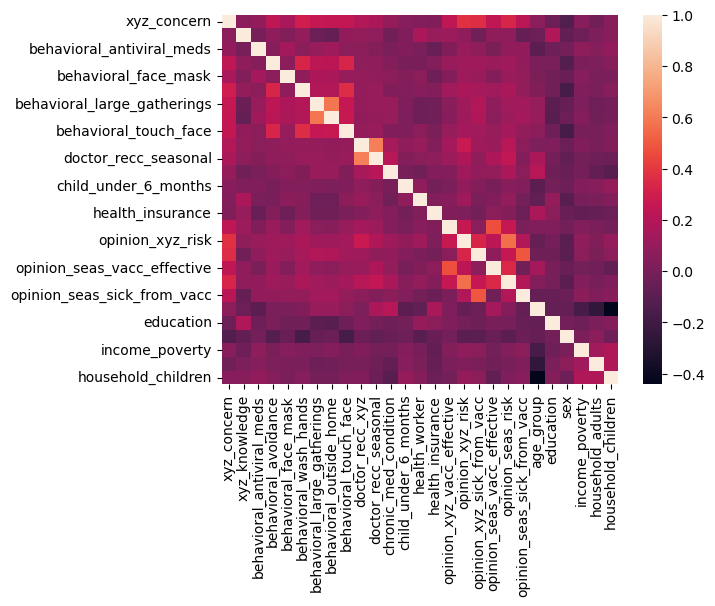

In [57]:
sns.heatmap(X_transformed.corr())

In [58]:
X_xyz = X_transformed.copy()

#X_xyz.drop([column for column in X.columns if "seas" in column], axis=1, inplace=True)
X_xyz.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,sex,income_poverty,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,1,1,0,...,1,1,0,1,3,1,0,2,0,0
1,3,2,0,1,0,1,0,1,1,0,...,3,3,1,3,1,0,1,2,0,0
2,1,1,0,1,0,0,0,0,0,0,...,0,3,0,1,0,2,1,0,2,0
3,1,1,0,1,0,1,1,0,0,0,...,4,4,3,0,4,0,0,2,0,0
4,2,1,0,1,0,1,1,0,1,0,...,1,2,0,3,2,3,0,0,1,0


In [59]:
X_seas = X_transformed.copy()

#X_seas.drop([column for column in X.columns if "xyz" in column], axis=1, inplace=True)
X_seas.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,sex,income_poverty,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1,0,0,0,0,0,0,1,1,0,...,1,1,0,1,3,1,0,2,0,0
1,3,2,0,1,0,1,0,1,1,0,...,3,3,1,3,1,0,1,2,0,0
2,1,1,0,1,0,0,0,0,0,0,...,0,3,0,1,0,2,1,0,2,0
3,1,1,0,1,0,1,1,0,0,0,...,4,4,3,0,4,0,0,2,0,0
4,2,1,0,1,0,1,1,0,1,0,...,1,2,0,3,2,3,0,0,1,0


In [60]:
Y_xyz = Y.copy()
Y_xyz.drop("seasonal_vaccine", axis=1, inplace=True)

In [61]:
Y_seas = Y.copy()
Y_seas.drop("xyz_vaccine", axis=1, inplace=True)

# Logistic Regression

In [62]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## XYZ model

In [63]:
X_train_xyz, X_test_xyz, Y_train_xyz, Y_test_xyz = train_test_split(
    X_xyz, Y_xyz, test_size=0.5, random_state=42)

In [64]:
Y_train_xyz = Y_train_xyz["xyz_vaccine"]
Y_test_xyz = Y_test_xyz["xyz_vaccine"]

In [65]:
logi_xyz = LogisticRegression().fit(X_train_xyz, Y_train_xyz)

In [66]:
accuracy_score(Y_test_xyz, logi_xyz.predict(X_test_xyz))

0.8331805682859762

In [67]:
roc_auc_score(Y_test_xyz, logi_xyz.predict(X_test_xyz))

0.6861467242255164

### Probs

In [68]:
logi_xyz.predict_proba(X_test_xyz)

array([[0.92365189, 0.07634811],
       [0.89141383, 0.10858617],
       [0.92268182, 0.07731818],
       ...,
       [0.88533872, 0.11466128],
       [0.89766798, 0.10233202],
       [0.90821903, 0.09178097]])

In [69]:
roc_auc_score(Y_test_xyz, logi_xyz.predict_proba(X_test_xyz)[:,1])

0.8286751171325925

## Seasonal model

In [70]:
X_train_seas, X_test_seas, Y_train_seas, Y_test_seas = train_test_split(
    X_seas, Y_seas, test_size=0.5, random_state=42)

In [71]:
Y_train_seas = Y_train_seas["seasonal_vaccine"]
Y_test_seas = Y_test_seas["seasonal_vaccine"]

In [72]:
logi_seas = LogisticRegression().fit(X_train_seas, Y_train_seas)

In [73]:
accuracy_score(Y_test_seas, logi_seas.predict(X_test_seas))

0.7770185817848513

In [74]:
roc_auc_score(Y_test_seas, logi_seas.predict(X_test_seas))

0.7750985169281844

### Probs

In [75]:
logi_seas.predict_proba(X_test_seas)

array([[0.80090499, 0.19909501],
       [0.77143753, 0.22856247],
       [0.91625909, 0.08374091],
       ...,
       [0.91146657, 0.08853343],
       [0.24937406, 0.75062594],
       [0.68527096, 0.31472904]])

In [76]:
roc_auc_score(Y_test_seas, logi_seas.predict_proba(X_test_seas)[:,1])

0.8491816438882425

# Naive Bayes

## XYZ model

In [77]:
cnb_xyz = CategoricalNB().fit(X_train_xyz, Y_train_xyz)

In [78]:
accuracy_score(Y_test_xyz, cnb_xyz.predict(X_test_xyz))

0.7961003249729189

In [79]:
roc_auc_score(Y_test_xyz, cnb_xyz.predict(X_test_xyz))

0.7201199267720746

### Probs

In [80]:
cnb_xyz.predict_proba(X_test_xyz)

array([[0.9568886 , 0.0431114 ],
       [0.91404303, 0.08595697],
       [0.97427362, 0.02572638],
       ...,
       [0.97784357, 0.02215643],
       [0.95995813, 0.04004187],
       [0.9436374 , 0.0563626 ]])

In [81]:
roc_auc_score(Y_test_xyz, cnb_xyz.predict_proba(X_test_xyz)[:,1])

0.8036656052534745

## Seasonal model

In [82]:
cnb_seas = CategoricalNB().fit(X_train_seas, Y_train_seas)

In [83]:
accuracy_score(Y_test_seas, cnb_seas.predict(X_test_seas))

0.7571869010915757

In [84]:
roc_auc_score(Y_test_seas, cnb_seas.predict(X_test_seas))

0.7558403288367517

### Probs

In [85]:
cnb_seas.predict_proba(X_test_seas)

array([[0.8676769 , 0.1323231 ],
       [0.85016761, 0.14983239],
       [0.96634535, 0.03365465],
       ...,
       [0.98090041, 0.01909959],
       [0.23868981, 0.76131019],
       [0.74098538, 0.25901462]])

In [86]:
roc_auc_score(Y_test_seas, cnb_seas.predict_proba(X_test_seas)[:,1])

0.8284695452706716

# SVM

In [87]:
from sklearn.svm import SVC

## XYZ model

In [88]:
svm_xyz = SVC(kernel='rbf', gamma='auto', probability=True, class_weight='balanced').fit(X_train_xyz, Y_train_xyz)

In [89]:
accuracy_score(Y_test_xyz, svm_xyz.predict(X_test_xyz))

0.783101408215982

In [90]:
roc_auc_score(Y_test_xyz, svm_xyz.predict(X_test_xyz))

0.7596822803172655

### Probs


In [91]:
svm_xyz.predict_proba(X_test_xyz)

array([[0.93248668, 0.06751332],
       [0.89437383, 0.10562617],
       [0.95873712, 0.04126288],
       ...,
       [0.93402493, 0.06597507],
       [0.91600401, 0.08399599],
       [0.90170381, 0.09829619]])

In [92]:
roc_auc_score(Y_test_xyz, svm_xyz.predict_proba(X_test_xyz)[:,1])

0.8295594197607881

## Seasonal model

In [93]:
svm_seas = SVC(kernel='rbf', gamma='auto', probability=True, class_weight='balanced').fit(X_train_seas, Y_train_seas)

In [94]:
accuracy_score(Y_test_seas, svm_seas.predict(X_test_seas))

0.7826847762686443

In [95]:
roc_auc_score(Y_test_seas, svm_seas.predict(X_test_seas))

0.7826817067550762

### Probs

In [96]:
svm_seas.predict_proba(X_test_seas)

array([[0.85075031, 0.14924969],
       [0.75873416, 0.24126584],
       [0.87720966, 0.12279034],
       ...,
       [0.91086913, 0.08913087],
       [0.18201534, 0.81798466],
       [0.65997989, 0.34002011]])

In [97]:
roc_auc_score(Y_test_seas, svm_seas.predict_proba(X_test_seas)[:,1])

0.8541839759550391

# Final Data

## Training

In [98]:
Y_xyz = Y_xyz["xyz_vaccine"]
Y_seas = Y_seas["seasonal_vaccine"]

In [99]:
svm_xyz_total = SVC(kernel='rbf', gamma='auto', probability=True, class_weight='balanced').fit(X_xyz, Y_xyz)
svm_seas_total = SVC(kernel='rbf', gamma='auto', probability=True, class_weight='balanced').fit(X_seas, Y_seas)

## Preparing data

In [100]:
final_test = pd.read_csv("datasets/test_set_features.csv")
final_test.set_index("respondent_id", inplace=True)
final_test.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [101]:
final_test.drop(["employment_industry", "employment_occupation", "rent_or_own", "census_msa", "hhs_geo_region", "race", "marital_status", "employment_status"], axis=1, inplace=True)
final_test.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,sex,income_poverty,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,5.0,1.0,1.0,35 - 44 Years,College Graduate,Female,"> $75,000",1.0,0.0
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,4.0,1.0,1.0,18 - 34 Years,12 Years,Male,Below Poverty,3.0,0.0
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,2.0,5.0,4.0,4.0,55 - 64 Years,College Graduate,Male,"> $75,000",1.0,0.0
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,2.0,4.0,4.0,2.0,65+ Years,12 Years,Female,"<= $75,000, Above Poverty",1.0,0.0
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,4.0,4.0,4.0,2.0,35 - 44 Years,12 Years,Female,"<= $75,000, Above Poverty",0.0,1.0


In [102]:
final_test["health_insurance"] = final_test["health_insurance"].fillna(1.0)
final_test["doctor_recc_xyz"] = final_test["doctor_recc_xyz"].fillna(final_test["xyz_concern"].map({0.0:0.0, 1.0:0.0, 2.0:0.0, 3.0:1.0}))
final_test["doctor_recc_seasonal"] = final_test["doctor_recc_seasonal"].fillna(final_test["doctor_recc_xyz"])

final_test = final_test.fillna(final_test.mode().iloc[0])
final_test.isna().any().sum()

0

In [103]:
for column in final_test.columns:
    final_test[column] = encoders[column].transform(final_test[column])

final_test = final_test.astype('int64')
final_test.head()

,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_xyz,...,opinion_xyz_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,sex,income_poverty,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2,2,0,1,0,1,1,0,1,0,...,0,4,0,0,1,2,0,1,1,0
26708,1,1,0,0,0,0,0,0,0,0,...,0,3,0,0,0,0,1,2,3,0
26709,2,2,0,0,1,1,1,1,1,0,...,1,4,3,3,3,2,1,1,1,0
26710,1,1,0,0,0,0,0,0,0,1,...,1,3,3,1,4,0,0,0,1,0
26711,3,1,1,1,0,1,1,1,1,0,...,3,3,3,1,1,0,0,0,0,1


## Predicting

In [104]:
xyz_output = svm_xyz_total.predict_proba(final_test)[:,1]
seas_output = svm_seas_total.predict_proba(final_test)[:,1]

In [105]:
xyz_output

array([0.06287212, 0.051512  , 0.48494636, ..., 0.11952632, 0.04193774,
       0.71129339])

In [106]:
seas_output

array([0.17386688, 0.12236313, 0.81591784, ..., 0.19109679, 0.41350985,
       0.68992602])

In [107]:
final_output = pd.DataFrame({"xyz_vaccine":xyz_output, "seasonal_vaccine":seas_output}, index=final_test.index)
final_output

,xyz_vaccine,seasonal_vaccine
respondent_id,,
26707,0.062872,0.173867
26708,0.051512,0.122363
26709,0.484946,0.815918
26710,0.509240,0.845582
26711,0.188180,0.494450
...,...,...
53410,0.476659,0.422082
53411,0.057506,0.142361
53412,0.119526,0.191097


In [108]:
final_output.to_csv("output.csv")